In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir('./input'))

['gender_submission.csv', 'test.csv', 'train.csv']


In [98]:
train=pd.read_csv('./input/train.csv')
test=pd.read_csv('./input/test.csv')

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
train.shape,test.shape

((891, 12), (418, 11))

In [106]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [112]:
corr_matrix=train.drop('PassengerId',axis=1).corr()

In [113]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

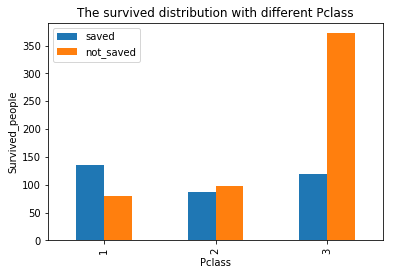

In [115]:
#看看各等级乘客的获救情况
fig = plt.figure()
Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar')
plt.title("The survived distribution with different Pclass")
plt.xlabel("Pclass") 
plt.ylabel('Survived_people') 

Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

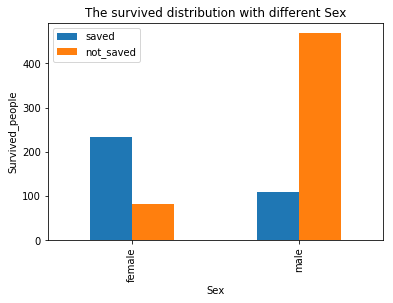

In [122]:
#看看不同性别乘客获救情况
fig = plt.figure()
Survived_0 = train.Sex[train.Survived == 0].value_counts()
Survived_1 = train.Sex[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar')
plt.title("The survived distribution with different Sex")
plt.xlabel("Sex") 
plt.ylabel('Survived_people') 

Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

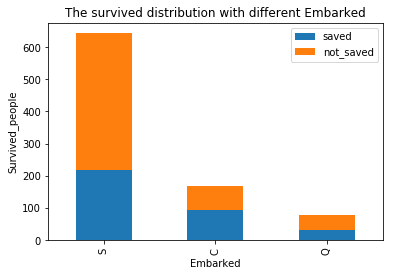

In [131]:
#各登录港口的获救情况
fig = plt.figure()
Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("The survived distribution with different Embarked")
plt.xlabel("Embarked") 
plt.ylabel('Survived_people')  

Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

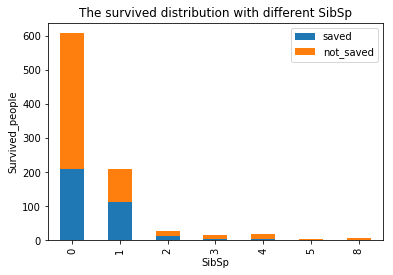

In [127]:
fig = plt.figure()
Survived_0 = train.SibSp[train.Survived == 0].value_counts()
Survived_1 = train.SibSp[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("The survived distribution with different SibSp")
plt.xlabel("SibSp") 
plt.ylabel('Survived_people') 

Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

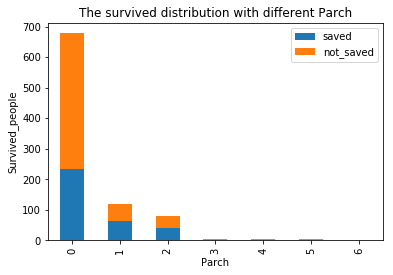

In [128]:
fig = plt.figure()
Survived_0 = train.Parch[train.Survived == 0].value_counts()
Survived_1 = train.Parch[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("The survived distribution with different Parch")
plt.xlabel("Parch") 
plt.ylabel('Survived_people') 

Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

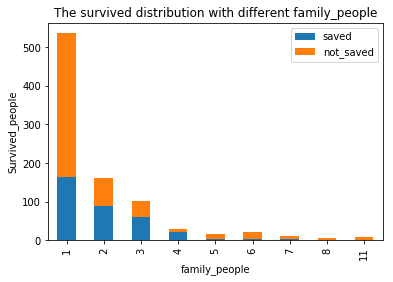

In [129]:
train['family_people']=train['SibSp']+train['Parch']+1
fig = plt.figure()
Survived_0 = train.family_people[train.Survived == 0].value_counts()
Survived_1 = train.family_people[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("The survived distribution with different family_people")
plt.xlabel("family_people") 
plt.ylabel('Survived_people')

In [139]:
train['Name']=train['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
train['Name']=train['Name'].apply(change_name)
train.loc[(train['Name']=='Dr')&(train['Sex']=='female'),'Name']='Mrs'
train.loc[(train['Name']=='Dr')&(train['Sex']=='male'),'Name']='Mr'

In [148]:
train['Age_fillna']=train['Age_fillna'].apply(ageclass_estimator) 

Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

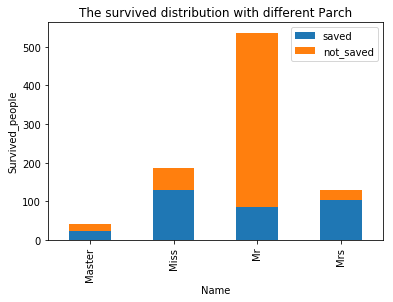

In [143]:
fig = plt.figure()
Survived_0 = train.Name[train.Survived == 0].value_counts()
Survived_1 = train.Name[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("The survived distribution with different Parch")
plt.xlabel("Name") 
plt.ylabel('Survived_people') 

Text(0, 0.5, 'Survived_people')

<Figure size 432x288 with 0 Axes>

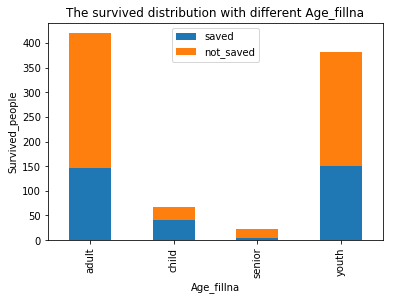

In [149]:
fig = plt.figure()
Survived_0 = train.Age_fillna[train.Survived == 0].value_counts()
Survived_1 = train.Age_fillna[train.Survived == 1].value_counts()
df=pd.DataFrame({'saved':Survived_1, 'not_saved':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("The survived distribution with different Age_fillna")
plt.xlabel("Age_fillna") 
plt.ylabel('Survived_people') 

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
family_people    891 non-null int64
Age_fillna       891 non-null float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.5+ KB


# deal with missing data

In [49]:
def missing_values_table(df):
    mis_val = df.isnull().sum().sort_values(ascending=False)
    mis_val_percent = np.round(mis_val / len(df)*100,2)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1,keys=['Total','Percent'])
    mis_val_table=mis_val_table[mis_val_table['Total']>0]
    return mis_val_table

In [50]:
missing_values_table(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [51]:
missing_values_table(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


In [52]:
def percent_table(df,var):
    percent=pd.DataFrame(np.round(df[var].value_counts(dropna=False,normalize=True)*100,2))
    total=pd.DataFrame(df[var].value_counts(dropna=False))
    percent_table=pd.concat([total,percent],axis=1,keys=['total','percent'])
    return percent_table

In [53]:
percent_table(train,'Embarked')

,total,percent
,Embarked,Embarked
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


Text(0.5, 1.0, 'Training Set')

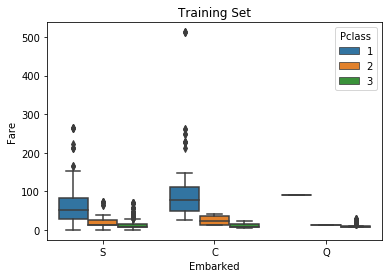

In [15]:
plt.figure()
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train);
plt.title("Training Set")

Text(0.5, 1.0, 'Test Set')

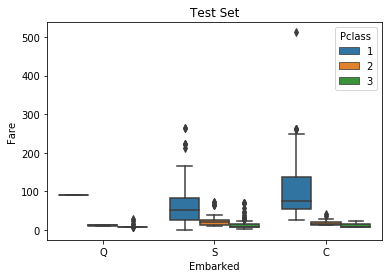

In [16]:
plt.figure()
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test);
plt.title('Test Set')

In [54]:
train['Embarked'].fillna('C',inplace=True)

In [18]:
def deal_with_age_missing(df):
    process_df=df[['Age','Pclass','SibSp','Fare','Parch']]
    age_known=process_df[process_df['Age'].notnull()]
    age_unknown=process_df[process_df['Age'].isnull()]
    y=age_known.iloc[:,0]
    X=age_known.iloc[:,1:]
    X_test=age_unknown.iloc[:,1:]
    rfr=RandomForestRegressor(n_estimators=500,n_jobs =-1,random_state=0)
    rfr.fit(X,y)
    y_predict=rfr.predict(X_test)
    df.loc[df['Age'].isnull(),'Age']=y_predict
    return df,rfr

In [55]:
train,rfr=deal_with_age_missing(train)

In [56]:
def deal_with_cabin_missing(df):
    df['Cabin'].fillna('Z',inplace=True)
    df['Cabin_mark']=df['Cabin'].apply(lambda x:'yes'if(x=='Z') else 'No')
    return df

In [57]:
train=deal_with_cabin_missing(train)

In [58]:
def ageclass_estimator(value):
    if (value<=10.0):
        new_value='child'
    elif (value>10.0) &(value<=30.0):
        new_value='youth'
    elif (value>30.0) &(value<=60.0):
        new_value='adult'
    elif value>60.0:
        new_value='senior'
    return new_value

In [59]:
train['Cabin']=train['Cabin'].apply(lambda x:x[0])
train['Name']=train['Name'].str.split(',',expand=True)[1].str.split(".", expand=True)[0]
train['Age']=train['Age'].apply(ageclass_estimator) 

In [74]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
train['Fare_scaled'] = scaler.fit_transform(train['Fare'].values.reshape(-1,1))

In [139]:
train.to_csv('outcome1.csv')

In [82]:
features=train.drop(['PassengerId','Ticket','Survived','Fare'],axis=1)
target=train['Survived']

In [83]:
features.shape

(891, 10)

In [84]:
final_features=pd.get_dummies(features)

In [85]:
final_features.shape

(891, 41)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Models

# 1. Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [213]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
clf_lr=LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
scores=cross_val_score(clf_lr,X_train, y_train, cv=kfolds, scoring="accuracy")
print(scores.mean())

0.828677621283255


In [214]:
from sklearn.model_selection import GridSearchCV
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
penalties = ['l1','l2']
param = {'penalty': penalties, 'C': C_vals}
logreg = LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
gsearch = GridSearchCV(logreg, param_grid=param, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:   34.6s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:   36.6s finished


({'C': 0.3, 'penalty': 'l2'}, 0.8258426966292135)

In [93]:
logreg_model=LogisticRegression(C=0.3, penalty='l2', tol=1e-6)
logreg_model.fit(X_train,y_train)
y_train_pred=logreg_model.predict(X_train)

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [103]:
confusion_matrix(y_train, y_train_pred)

array([[400,  44],
       [ 70, 198]], dtype=int64)

In [104]:
precision_score(y_train, y_train_pred)

0.8181818181818182

In [105]:
recall_score(y_train, y_train_pred)

0.7388059701492538

In [106]:
f1_score(y_train,y_train_pred)

0.7764705882352942

In [109]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(clf_lr,X_train, y_train, cv=kfolds,method="decision_function")

In [110]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

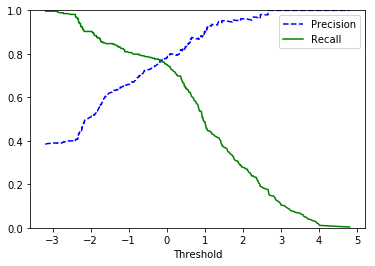

In [112]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure()
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

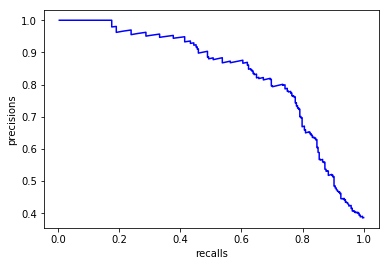

In [117]:
def plot_precision_vs_recall(precisions,recalls):
    plt.figure()
    plt.plot(recalls[:-1],precisions[:-1],"b-")
    plt.xlabel("recalls")
    plt.ylabel('precisions')
plot_precision_vs_recall(precisions,recalls)

In [118]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

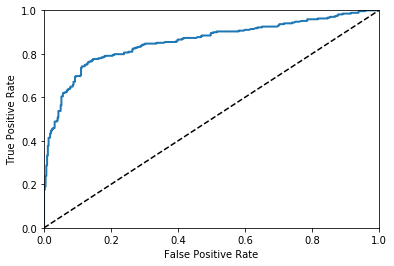

In [119]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure()
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)

In [120]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8567970956030657

In [94]:
from sklearn.metrics import accuracy_score
def plot_learning_curves(model, X, y):
    X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(2, len(X_train1)):
        model.fit(X_train1[:m], y_train1[:m])
        y_train_predict = model.predict(X_train1[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(1-accuracy_score(y_train[:m],y_train_predict))
        val_errors.append(1-accuracy_score(y_val,y_val_predict))
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

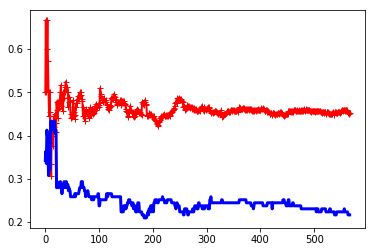

In [95]:
plot_learning_curves(logreg_model,X_train,y_train)

# 利用特征工程方法重新清洗数据

In [188]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')

In [161]:
def change_name(value):
    new_name='unknown'
    if value in [' Mr',' Don',' Rev',' Major',' Sir',' Jonkheer',' Col',' Capt']:
        new_name='Mr'
    elif value in [' Mrs',' Mme',' the Countess',' Lady',' Dona']:
        new_name='Mrs'
    elif value in [' Miss',' Ms',' Mlle']:
        new_name='Miss'
    elif value==' Master':
        new_name='Master'
    elif value==' Dr':
        new_name='Dr'
    return new_name

In [162]:
def deal_with_name_attribute(df):
    df['Name']=df['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
    df['Name']=df['Name'].apply(change_name)
    df.loc[(df['Name']=='Dr')&(df['Sex']=='female'),'Name']='Mrs'
    df.loc[(df['Name']=='Dr')&(df['Sex']=='male'),'Name']='Mr'
    return df  

In [163]:
def ageclass_estimator(value):
    if (value<=10.0):
        new_value='child'
    elif (value>10.0) &(value<=30.0):
        new_value='youth'
    elif (value>30.0) &(value<=60.0):
        new_value='adult'
    elif value>60.0:
        new_value='senior'
    return new_value

In [164]:
def deal_with_missing_age(df):
    name_age=df.groupby('Name')['Age'].mean().reset_index()
    df['Age_fillna']=df['Age']
    df.loc[(df['Age_fillna'].isnull())&(df['Name']=='Master'),'Age_fillna']=name_age['Age'][0]
    df.loc[(df['Age_fillna'].isnull())&(df['Name']=='Miss'),'Age_fillna']=name_age['Age'][1]
    df.loc[(df['Age_fillna'].isnull())&(df['Name']=='Mr'),'Age_fillna']=name_age['Age'][2]
    df.loc[(df['Age_fillna'].isnull())&(df['Name']=='Mrs'),'Age_fillna']=name_age['Age'][3]
    df['Age_fillna']=df['Age_fillna'].apply(ageclass_estimator)
    return df

In [165]:
def deal_with_cabin_missing(df):
    df['Cabin'].fillna('Z',inplace=True)
    df['Cabin_mark']=df['Cabin'].apply(lambda x:'yes'if(x=='Z') else 'No')
    df['Cabin']=df['Cabin'].apply(lambda x:x[0])
    return df

In [166]:
def deal_with_missing_fare(df):
    pclass_fare=df.groupby('Pclass')['Fare'].median().reset_index()
    df.loc[(df['Fare'].isnull())&(df['Pclass']==1),'Fare']=pclass_fare['Fare'][0]
    df.loc[(df['Fare'].isnull())&(df['Pclass']==2),'Fare']=pclass_fare['Fare'][1]
    df.loc[(df['Fare'].isnull())&(df['Pclass']==3),'Fare']=pclass_fare['Fare'][2]
    return df

In [189]:
def clean_transform_data(df):
    df=deal_with_name_attribute(df)
    df=deal_with_missing_age(df)
    df=deal_with_cabin_missing(df)
    df=deal_with_missing_fare(df)
    df['family_people']=df['SibSp']+df['Parch']+1
    df['Fare_per_people']=df['Fare']/df['family_people']
    df['person_alone'] = df['family_people'].apply(lambda x:'No' if x>1 else 'Yes') 
    df['Fare_strait'] = pd.qcut(df['Fare'], 4)
    df.drop(['PassengerId','Age','Ticket','Fare'],axis=1,inplace=True)
    return df

In [190]:
train_features=clean_transform_data(train_data)
test_features=clean_transform_data(test_data)

In [191]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
SibSp              891 non-null int64
Parch              891 non-null int64
Cabin              891 non-null object
Embarked           889 non-null object
Age_fillna         891 non-null object
Cabin_mark         891 non-null object
family_people      891 non-null int64
Fare_per_people    891 non-null float64
person_alone       891 non-null object
Fare_strait        891 non-null category
dtypes: category(1), float64(1), int64(5), object(7)
memory usage: 91.5+ KB


data_analysis

In [192]:
for x in train_features:
    if train_features[x].dtype!='float64':
        print('Survival Correlation by:', x)
        print(train_features.groupby(x, as_index=False)['Survived'].mean())
        print('-'*10, '\n')

Survival Correlation by: Survived
0    0.0
1    1.0
dtype: float64
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Name
     Name  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.160149
3     Mrs  0.798450
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: Cabin
  Cabin  Survived
0     A  0.466667
1     B  0.744681
2     C  0.593220
3     D  0.757576
4     E  0.750000
5     F  0.615385
6

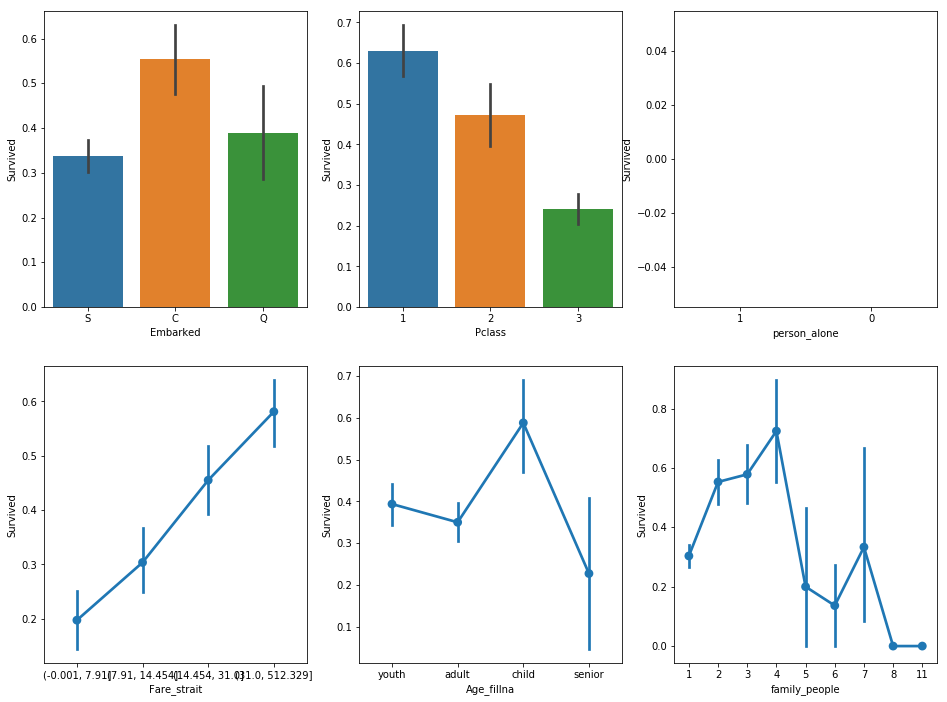

In [193]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(x = 'Embarked', y = 'Survived', data=train_features, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_features, ax = saxis[0,1])
sns.barplot(x = '', y = 'Survived', order=[1,0], data=train_features, ax = saxis[0,2])
sns.pointplot(x = 'Fare_strait', y = 'Survived',  data=train_features, ax = saxis[1,0])
sns.pointplot(x = 'Age_fillna', y = 'Survived',  data=train_features, ax = saxis[1,1])
sns.pointplot(x = 'family_people', y = 'Survived', data=train_features, ax = saxis[1,2])

Text(0.5, 1.0, 'Sex vs Pclass Survival Comparison')

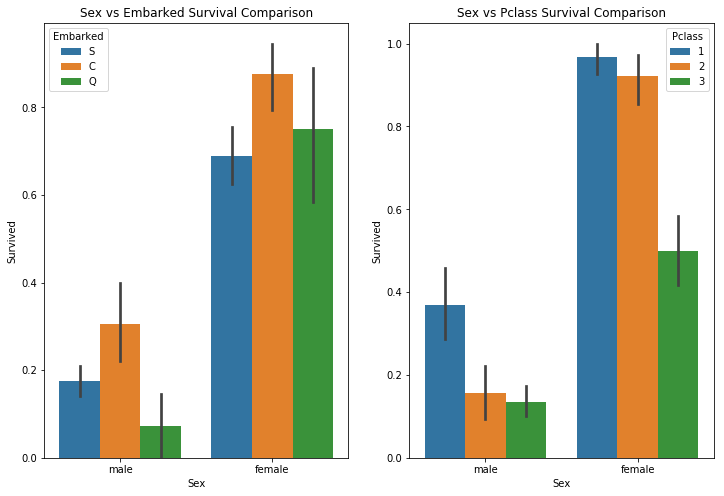

In [200]:
fig, qaxis = plt.subplots(1,2,figsize=(12,8))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=train_features, ax = qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train_features, ax  = qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')

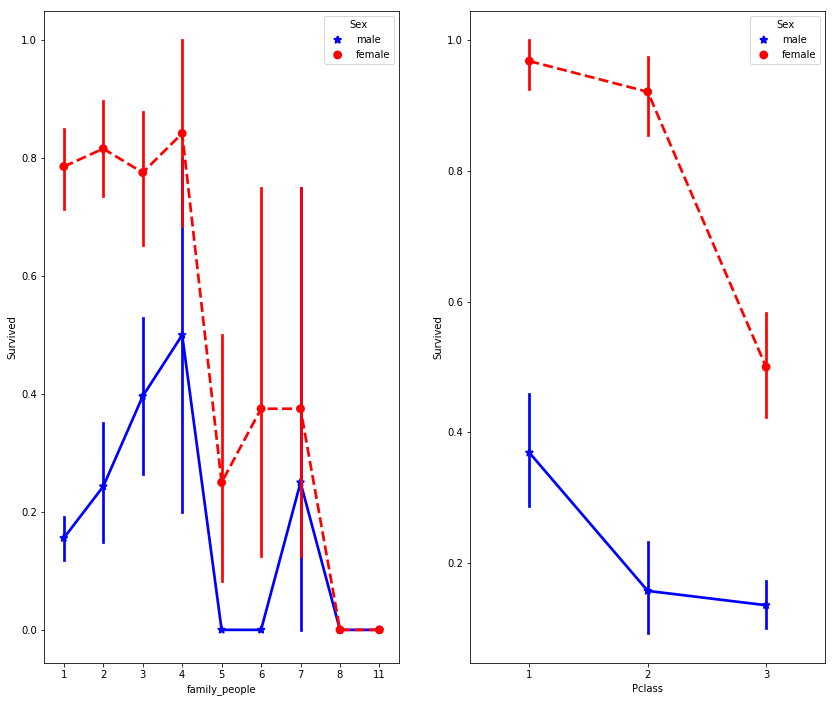

In [203]:
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))
#how does family size factor with sex & survival compare
sns.pointplot(x="family_people", y="Survived", hue="Sex", data=train_features,
              palette={"male": "blue", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_features,
              palette={"male": "blue", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

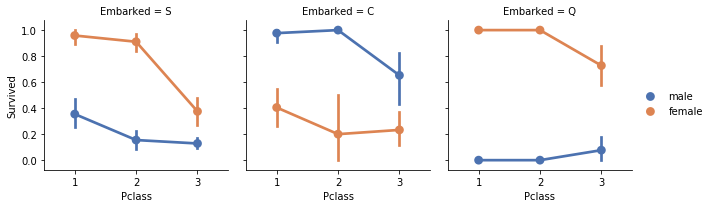

In [205]:
e = sns.FacetGrid(train_features, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

In [206]:
train_features.shape,test_features.shape

((891, 14), (418, 13))

In [207]:
y=train_features['Survived']
train_value=train_features
test_value=test_features

In [208]:
features = pd.concat([train_value, test_value]).reset_index(drop=True)
final_features = pd.get_dummies(features).reset_index(drop=True)

In [209]:
X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(y):, :]

In [211]:
X_test.shape

(418, 40)

In [ ]:
logreg_model=LogisticRegression(C=0.3, penalty='l2', tol=1e-6)
logreg_model.fit(X_train,y_train)
y_train_pred=logreg_model.predict(X_train)